# INTRODUCTION
In the digital age, the volume of books available online has grown exponentially, making it increasingly difficult for readers to discover content that matches their interests. Recommendation systems have emerged as powerful tools to personalize user experiences and improve engagement across platforms. An Online Book Recommender System uses data about user preferences and item features to suggest books that users are likely to enjoy, based on their reading history or similarity to other users

## PROBLEM STATEMENT
With thousands of books being added to online platforms every day, users often face challenges in choosing what to read next. This leads to decision fatigue and can reduce user satisfaction and engagement. Without personalized recommendations, users may overlook books that align with their tastes, while content creators and publishers may struggle to reach their target audience. Therefore, there is a need for an intelligent system that can filter through vast book collections and recommend titles tailored to individual user preferences

## Objectives

### General Objective
To develop a machine learning-based book recommender system that provides personalized book suggestions to users based on past ratings and book attributes.

### Specific Objectives
- To analyze and clean the book and rating datasets for accurate modeling.
- To implement **collaborative filtering** techniques (user-based and item-based) using historical rating data.
- To build a **content-based filtering** model that uses book metadata (e.g., title, author, genre).
- To evaluate the performance of the recommender models using relevant metrics such as RMSE, precision, and recall.
- To visualize trends in user preferences and book popularity.


### Loading the three datasets(books_df, rating_df and user_df)

In [1]:
# Loading the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset using the correct parameters
books_df = pd.read_csv(
    r'D:\PROJECT\Online-Book-Recommender-System\books_df.csv',
    sep=';',
    quotechar='"',
    encoding='latin1',
    on_bad_lines='skip'  # Correct parameter for pandas 1.3+
)

# Display the first 10 rows
books_df.head(5)



C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13652\1160086788.py:7: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books_df = pd.read_csv(


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [2]:
# Ratings_df
ratings_df = pd.read_csv(
    r'D:\PROJECT\Online-Book-Recommender-System\ratings_df.csv',
    sep=';',
    quotechar='"',
    encoding='latin1',
    on_bad_lines='skip'  # Correct parameter for pandas 1.3+
)

# Display the first 10 rows
ratings_df.head(5)

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [3]:
# user_df
user_df = pd.read_csv(
    r'D:\PROJECT\Online-Book-Recommender-System\user_df.csv',
    sep=';',
    quotechar='"',
    encoding='latin1',
    on_bad_lines='skip'  # Correct parameter for pandas 1.3+
)

# Display the first 10 rows
user_df.head(5)

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


### Data Inspection

Checking on the on the data types within the datasets and also number of columns and row on each.

In [4]:
def show_dataset_info():
    print("📘 books_df Info:")
    print("-" * 40)
    books_df.info()
    print("\n\n")

    print("⭐ ratings_df Info:")
    print("-" * 40)
    ratings_df.info()
    print("\n\n")

    print("👤 user_df Info:")
    print("-" * 40)
    user_df.info()
    print("\n\n")

#the function
show_dataset_info()


📘 books_df Info:
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB



⭐ ratings_df Info:
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-

## Columns discription for the datasets

<small>

## 📘 books_df Column Descriptions

| Column Name            | Description |
|------------------------|-------------|
| **ISBN**               | A unique identifier for each book (International Standard Book Number). |
| **Book-Title**         | The title of the book. |
| **Book-Author**        | The name of the book's author. |
| **Year-Of-Publication**| The year the book was published. May contain inconsistent or invalid values. |
| **Publisher**          | The name of the publishing company. |
| **Image-URL-S**        | URL to a small-sized image of the book cover. |
| **Image-URL-M**        | URL to a medium-sized image of the book cover. |
| **Image-URL-L**        | URL to a large-sized image of the book cover. |

## ⭐ ratings_df Column Descriptions

| Column Name    | Description |
|----------------|-------------|
| **User-ID**    | Unique identifier for each user who rated a book. |
| **ISBN**       | ISBN of the book that was rated (links to `books_df`). |
| **Book-Rating**| Rating given by the user to the book, typically on a scale of 0–10. A `0` may indicate no opinion or an implicit rating. |

## 👤 user_df Column Descriptions

| Column Name | Description |
|-------------|-------------|
| **User-ID** | Unique identifier for each user. Can be joined with `ratings_df`. |
| **Location**| The user’s location, often formatted as `City, State, Country`. |
| **Age**     | Age of the user. May include missing or out-of-range values (e.g., extremely young or old). |

</small>


### Data merging

This wil help on seeing the full picture of the datasets, which books have ratings, active users and finally relevant comlumns from each dataset.

In [5]:
# Step 1: Merge ratings with books (on ISBN)
ratings_books = pd.merge(ratings_df, books_df, on='ISBN', how='left')

# Step 2: Merge with users (on User-ID)
final_df = pd.merge(ratings_books, user_df, on='User-ID', how='left')

# Preview merged dataset
final_df.head()


,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Location,Age
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,"tyler, texas, usa",NaN
1,276726,0155061224,5,Rites of Passage,Judith Rae,2001,Heinle,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...,"seattle, washington, usa",NaN
2,276727,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,"h, new south wales, australia",16.0
3,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999,Cambridge University Press,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...,"rijeka, n/a, croatia",16.0
4,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001,Cambridge University Press,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...,"rijeka, n/a, croatia",16.0


<small>

## 🔗 Merging Strategy

### 📘 Ratings + Books Merge (on `ISBN`)
- `ISBN` is the unique identifier for each book.
- This merge enriches the ratings data with book metadata such as title, author, and publisher.
- A **left join** is used to ensure that all rating records are retained, even if some books are missing from the `books_df`.

### 👤 Result + Users Merge (on `User-ID`)
- `User-ID` is the unique identifier for each user.
- This merge adds demographic information such as user location and age to each rating record.
- Again, a **left join** is applied to keep all ratings, even when some user details are incomplete or unavailable.

<small>

In [6]:
# info about the final dataset
def show_final_dataset_info():
    print("📚 Final Dataset Info:")
    print("-" * 40)
    final_df.info()
    print("\n\n")
    print("📚 Final Dataset Shape:")
    print("-" * 40)
    print(final_df.shape)
    print("\n\n")
    print("📚 Final Dataset Columns:")
    print("-" * 40)
    print(final_df.columns) 
    print("\n\n")
    print("📚 Final Dataset Sample:")
    print("-" * 40)
    print(final_df.sample(5))   

# Call the function
show_final_dataset_info()

📚 Final Dataset Info:
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 12 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   User-ID              1149780 non-null  int64  
 1   ISBN                 1149780 non-null  object 
 2   Book-Rating          1149780 non-null  int64  
 3   Book-Title           1031136 non-null  object 
 4   Book-Author          1031134 non-null  object 
 5   Year-Of-Publication  1031136 non-null  object 
 6   Publisher            1031134 non-null  object 
 7   Image-URL-S          1031136 non-null  object 
 8   Image-URL-M          1031136 non-null  object 
 9   Image-URL-L          1031132 non-null  object 
 10  Location             1149780 non-null  object 
 11  Age                  840288 non-null   float64
dtypes: float64(1), int64(2), object(9)
memory usage: 105.3+ MB



📚 Final Dataset Shape:
------

# EXPLANATORY DATA ANALYSIS

## Data Cleaning

In [7]:
def inspect_data_quality():
    print("🧹 Data Quality Inspection for final_df:")
    print("-" * 40)

    # 1. Columns with missing values
    null_counts = final_df.isnull().sum()
    cols_with_nulls = null_counts[null_counts > 0]
    print("🔍 Columns with Null Values:")
    print(cols_with_nulls)
    print("\n")

    # 2. Number of duplicated rows
    duplicated_rows = final_df.duplicated().sum()
    print("🔁 Number of Duplicated Rows:")
    print(duplicated_rows)
    print("\n")

    # 3. Percentage of missing values per column
    percent_missing = (final_df.isnull().sum() / len(final_df)) * 100
    percent_missing = percent_missing[percent_missing > 0].sort_values(ascending=False)
    print("📉 Percentage of Missing Values per Column:")
    print(percent_missing.round(2))
    print("\n")

    return {
        "columns_with_nulls": cols_with_nulls,
        "duplicated_rows": duplicated_rows,
        "percent_missing": percent_missing
    }

# Call the function
inspect_data_quality()


🧹 Data Quality Inspection for final_df:
----------------------------------------
🔍 Columns with Null Values:
Book-Title             118644
Book-Author            118646
Year-Of-Publication    118644
Publisher              118646
Image-URL-S            118644
Image-URL-M            118644
Image-URL-L            118648
Age                    309492
dtype: int64


🔁 Number of Duplicated Rows:
0


📉 Percentage of Missing Values per Column:
Age                    26.92
Image-URL-L            10.32
Book-Author            10.32
Publisher              10.32
Book-Title             10.32
Year-Of-Publication    10.32
Image-URL-S            10.32
Image-URL-M            10.32
dtype: float64




{'columns_with_nulls': Book-Title             118644
 Book-Author            118646
 Year-Of-Publication    118644
 Publisher              118646
 Image-URL-S            118644
 Image-URL-M            118644
 Image-URL-L            118648
 Age                    309492
 dtype: int64,
 'duplicated_rows': 0,
 'percent_missing': Age                    26.917497
 Image-URL-L            10.319191
 Book-Author            10.319018
 Publisher              10.319018
 Book-Title             10.318844
 Year-Of-Publication    10.318844
 Image-URL-S            10.318844
 Image-URL-M            10.318844
 dtype: float64}

The dataset does not have duplicated columns and also the percentage of the missing values are not more than 50% per column. This means that we will fill in the missing values on each column and drop unncessarry columns.

In [8]:
# First, I will drop the unnecessary columns from the final_df DataFrame
cols_to_drop = ['Image-URL-L', 'Image-URL-S', 'Image-URL-M',]
final_df.drop(cols_to_drop, axis=1, inplace=True)


In [9]:
#Fil in the null values and NaN values with the mean of the column Age
final_df['Age'].fillna(final_df['Age'].mean(), inplace=True)



In [10]:
#Fill in the null values and NaN values with the mean of the column Year-Of-Publication and convert it back numerical years and not a float
# Convert 'Year-Of-Publication' to numeric, forcing errors to NaN
# Make sure the column is numeric first
final_df['Year-Of-Publication'] = pd.to_numeric(final_df['Year-Of-Publication'], errors='coerce')
# Fill NaN values with the mean of the column 
final_df['Year-Of-Publication'].mean()
# Fill NaN values with the mean of the column
final_df['Year-Of-Publication'].fillna(final_df['Year-Of-Publication'].mean(), inplace=True)
# Convert the column back to integer type
final_df['Year-Of-Publication'] = final_df['Year-Of-Publication'].astype(int)
# Check the data types of the columns
print(final_df.dtypes)
# Check for any remaining NaN values in the 'Year-Of-Publication' column
print(final_df['Year-Of-Publication'].isnull().sum())


User-ID                  int64
ISBN                    object
Book-Rating              int64
Book-Title              object
Book-Author             object
Year-Of-Publication      int32
Publisher               object
Location                object
Age                    float64
dtype: object
0


In [11]:
#Now let us recall the function to check the data quality after cleaning
inspect_data_quality()
# Call the function again to check data quality after cleaning  
# Check the first few rows of the cleaned dataset
final_df.head(5)

🧹 Data Quality Inspection for final_df:
----------------------------------------
🔍 Columns with Null Values:
Book-Title     118644
Book-Author    118646
Publisher      118646
dtype: int64


🔁 Number of Duplicated Rows:
0


📉 Percentage of Missing Values per Column:
Book-Author    10.32
Publisher      10.32
Book-Title     10.32
dtype: float64




,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Location,Age
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,"tyler, texas, usa",37.239724
1,276726,0155061224,5,Rites of Passage,Judith Rae,2001,Heinle,"seattle, washington, usa",37.239724
2,276727,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,"h, new south wales, australia",16.000000
3,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999,Cambridge University Press,"rijeka, n/a, croatia",16.000000
4,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001,Cambridge University Press,"rijeka, n/a, croatia",16.000000


In [12]:
#Drop the missing values under book title, book author, and book publisher
final_df.dropna(subset=['Book-Title', 'Book-Author', 'Publisher'], inplace=True)

In [13]:
#let us now see the shape of the final dataset after cleaning
print("Final dataset shape after cleaning:")
print(final_df.shape)

Final dataset shape after cleaning:
(1031132, 9)


## Feature Engineering

**1. Spliting the location column**

In [14]:
# Split the 'Location' column into City, State, and Country
final_df[['City', 'State', 'Country']] = final_df['Location'].str.split(',', n=2, expand=True)

# Remove leading/trailing whitespace and convert to lowercase for consistency
final_df['City'] = final_df['City'].str.strip().str.lower()
final_df['State'] = final_df['State'].str.strip().str.lower()
final_df['Country'] = final_df['Country'].str.strip().str.lower()


**2. Generating good and bad ratings columns**

In [103]:
# # Define good and bad ratings
# final_df['Good'] = final_df['Book-Rating'].apply(lambda x: 1 if x >= 4 and x <= 5 else 0)
# final_df['Bad'] = final_df['Book-Rating'].apply(lambda x: 1 if x >= 1 and x <= 3 else 0)


In [104]:
# #Now let us combine the new features with the existing dataset
# # Combine the new features with the existing dataset
# final_df = pd.concat([final_df, final_df[['Good', 'Bad']]], axis=1)
# # Check the first few rows of the updated dataset
# final_df.head(5)


In [15]:
#Recall the dataset
final_df.head(5)


,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Location,Age,City,State,Country
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,"tyler, texas, usa",37.239724,tyler,texas,usa
1,276726,0155061224,5,Rites of Passage,Judith Rae,2001,Heinle,"seattle, washington, usa",37.239724,seattle,washington,usa
2,276727,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,"h, new south wales, australia",16.000000,h,new south wales,australia
3,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999,Cambridge University Press,"rijeka, n/a, croatia",16.000000,rijeka,n/a,croatia
4,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001,Cambridge University Press,"rijeka, n/a, croatia",16.000000,rijeka,n/a,croatia


## Visualization

## 1) Univariate Analysis.
## a) Distribution of Book Ratings.

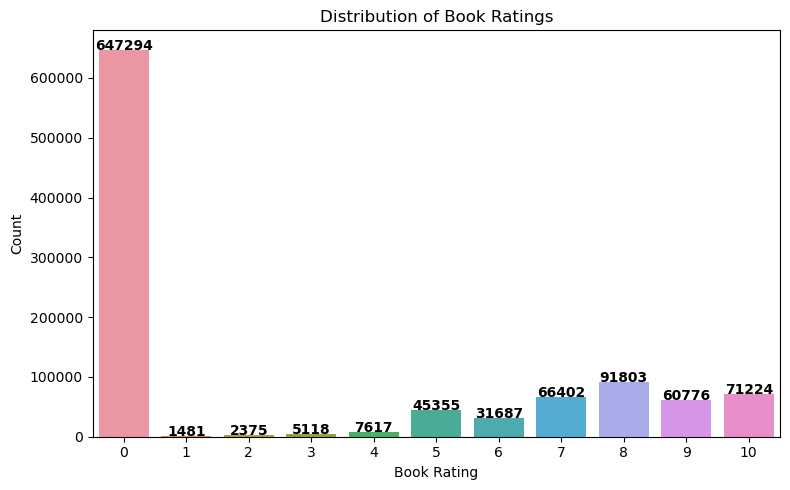

In [106]:

import seaborn as sns
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='Book-Rating', data=final_df)

# Add labels
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height() + 3, int(p.get_height()), ha='center', fontsize=10, fontweight='bold')

plt.title('Distribution of Book Ratings')
plt.xlabel('Book Rating')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


## b) Top publishers

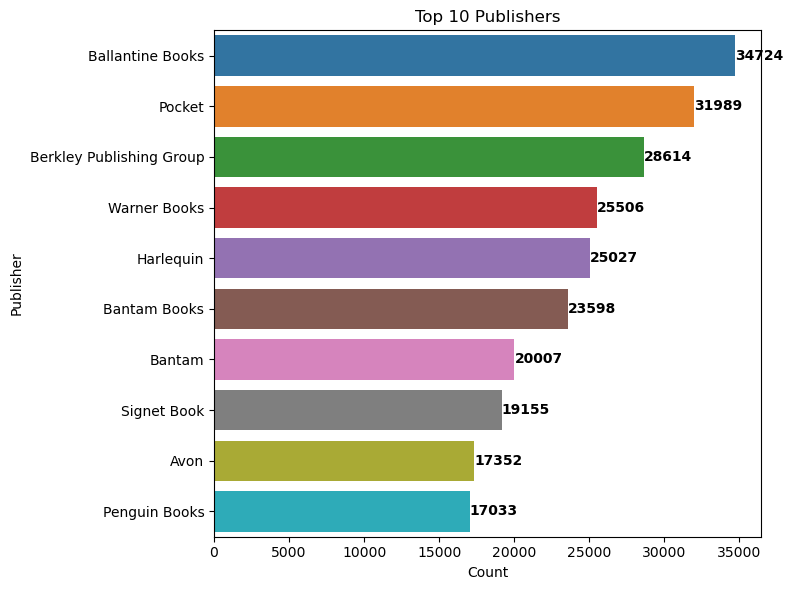

In [107]:
top_publishers = final_df['Publisher'].value_counts().head(10)

plt.figure(figsize=(8, 6))
ax = sns.barplot(x=top_publishers.values, y=top_publishers.index)

# Add labels
for i, v in enumerate(top_publishers.values):
    ax.text(v + 5, i, str(v), color='black', va='center', fontweight='bold')

plt.title('Top 10 Publishers')
plt.xlabel('Count')
plt.ylabel('Publisher')
plt.tight_layout()
plt.show()



## c) Top 10 Authors

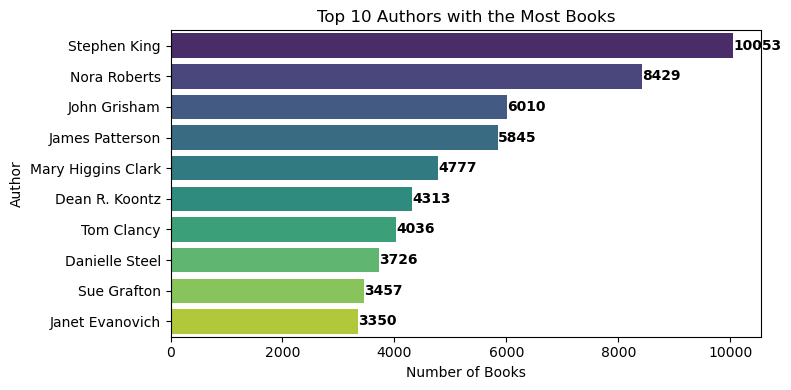

In [108]:
top_authors = final_df['Book-Author'].value_counts().head(10)

plt.figure(figsize=(8, 4))
ax = sns.barplot(x=top_authors.values, y=top_authors.index, palette='viridis')

# Add value labels
for i, v in enumerate(top_authors.values):
    ax.text(v + 1, i, str(v), color='black', va='center', fontweight='bold')

plt.title('Top 10 Authors with the Most Books')
plt.xlabel('Number of Books')
plt.ylabel('Author')
plt.tight_layout()
plt.show()


From these graphical represenatations, the top publisher is Balantine books, followed by Pocket and Berkely Publishing Group.

Majority of the books has 0 rating indicating that most readers has no opinion on the books they are reading.

## Bivariate Analysis

### a) Book Rating by Age Group

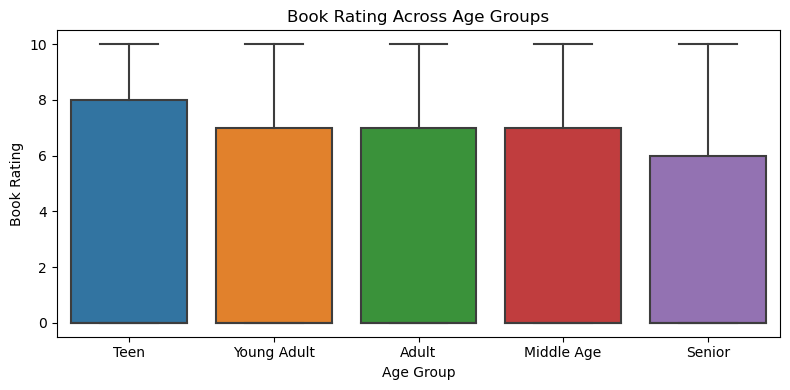

In [109]:
final_df['AgeGroup'] = pd.cut(final_df['Age'], bins=[0, 18, 30, 45, 60, 100], labels=['Teen', 'Young Adult', 'Adult', 'Middle Age', 'Senior'])

plt.figure(figsize=(8, 4))
sns.boxplot(x='AgeGroup', y='Book-Rating', data=final_df)
plt.title('Book Rating Across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Book Rating')
plt.tight_layout()
plt.show()


## b) Top Rated Books by Age Group

In [110]:
# Filter ratings > 0 and drop missing ages
age_data = final_df[(final_df['Book-Rating'] > 0) & (final_df['Age'].notnull())].copy()

# Create age group bins
bins = [0, 19, 29, 39, 49, 59, 69, 100]
labels = ['Teens', '20s', '30s', '40s', '50s', '60s', '70+']
age_data['Age-Group'] = pd.cut(age_data['Age'], bins=bins, labels=labels)

# Group by book and age group
age_group_stats = (
    age_data.groupby(['Book-Title', 'Age-Group'])
    .agg(avg_rating=('Book-Rating', 'mean'), num_ratings=('Book-Rating', 'count'))
    .reset_index()
)

# Get top 10 most rated books
top_books = (
    age_group_stats.groupby('Book-Title')['num_ratings']
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .index.tolist()
)

top_age_books = age_group_stats[age_group_stats['Book-Title'].isin(top_books)]




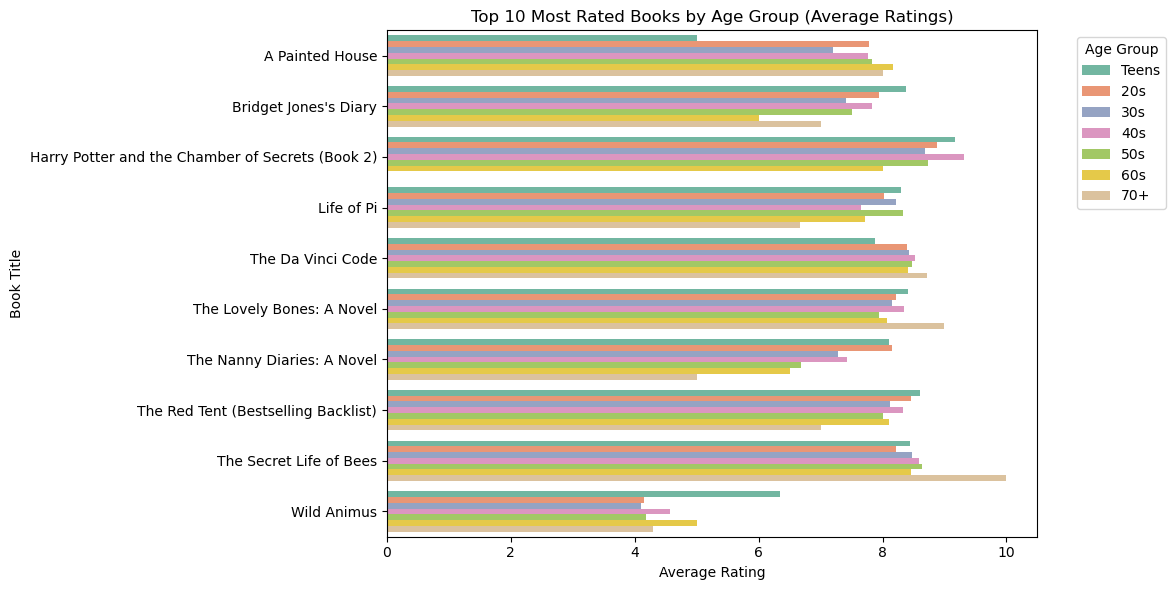

In [111]:

#Using Faceted barplot to visualize the average ratings of the top 10 most rated books by age group
plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_age_books,
    x='avg_rating',
    y='Book-Title',
    hue='Age-Group',
    palette='Set2'
)

plt.title('Top 10 Most Rated Books by Age Group (Average Ratings)')
plt.xlabel('Average Rating')
plt.ylabel('Book Title')
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Findings:

- Both images reveal a general trend of younger readers giving higher average ratings than older readers.

- The consistency of lower ratings from older age groups is evident in both analyses, but individual book preferences can buck this trend.

- "Wild Animus" is consistently rated lowest by all age groups.

- Younger age groups (Teens, 20s, 30s) tend to give higher ratings overall, but there are exceptions where older groups rate specific books more favorably.


## 3.) Multivariate Analysis

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_1444\3368426001.py:35: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


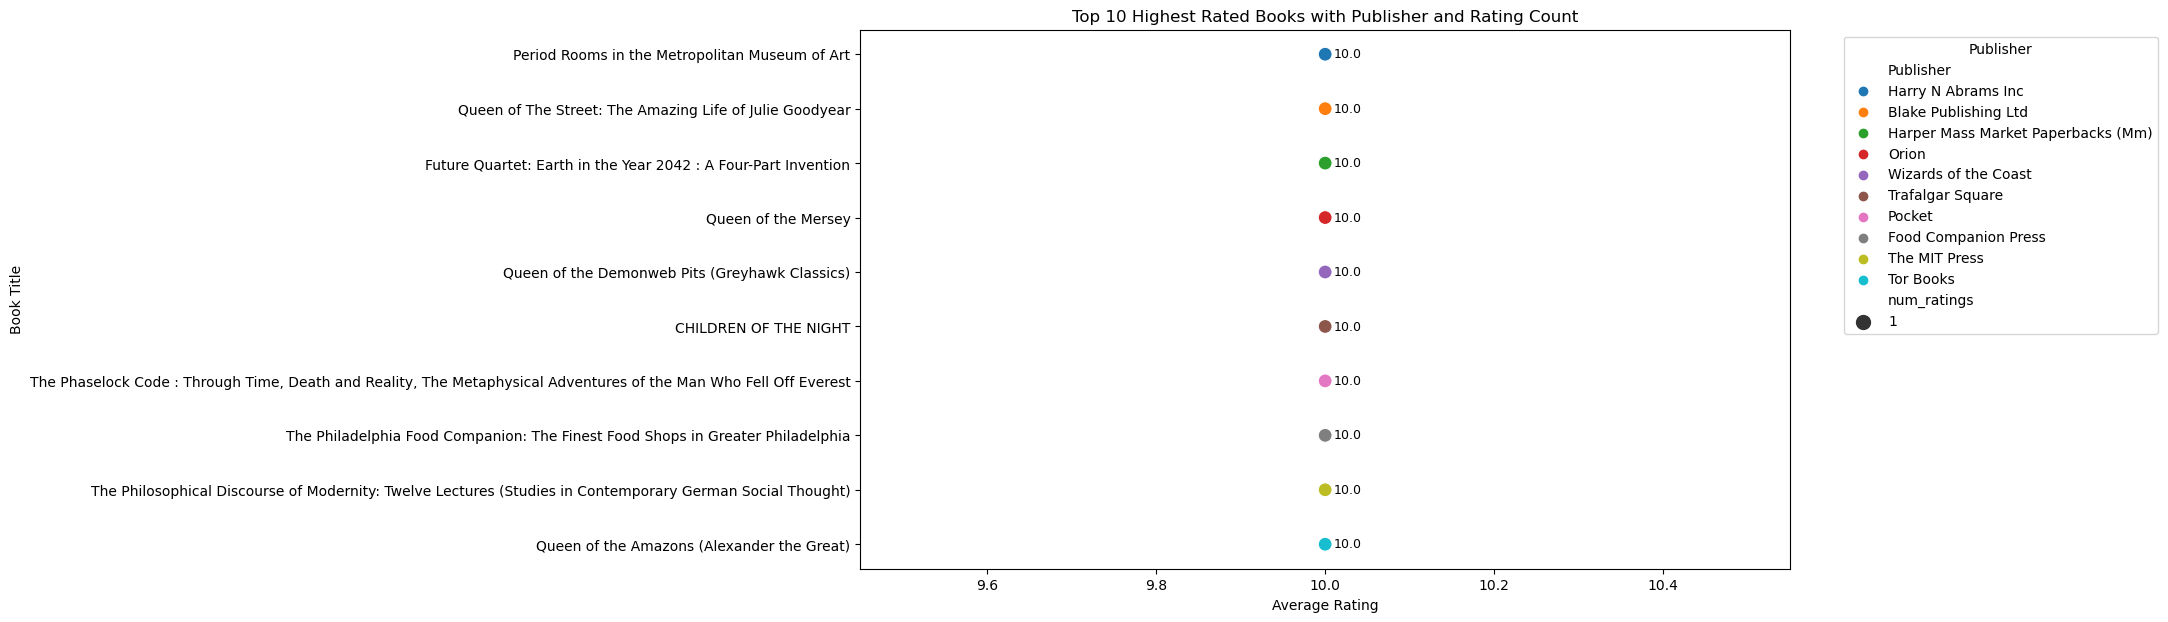

In [112]:
# Filter out 0 ratings
non_zero = final_df[final_df['Book-Rating'] > 0]

# Group by book and publisher, then get avg rating and count of ratings
book_stats = (
    non_zero.groupby(['Book-Title', 'Publisher'])
    .agg(avg_rating=('Book-Rating', 'mean'), num_ratings=('Book-Rating', 'count'))
    .sort_values(by='avg_rating', ascending=False)
    .head(10)
    .reset_index()
)

# Plotting
plt.figure(figsize=(12, 7))
scatter = sns.scatterplot(
    data=book_stats,
    x='avg_rating',
    y='Book-Title',
    size='num_ratings',
    hue='Publisher',
    palette='tab10',
    legend='full',
    sizes=(100, 1000)
)

# Add value labels
for i in range(len(book_stats)):
    row = book_stats.iloc[i]
    plt.text(row['avg_rating'] + 0.01, i, f"{row['avg_rating']:.1f}", va='center', fontsize=9)

plt.title('Top 10 Highest Rated Books with Publisher and Rating Count')
plt.xlabel('Average Rating')
plt.ylabel('Book Title')
plt.legend(title='Publisher', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


All the listed books are highly rated and the publishers too.
(To add more words)

# PREPROCESSING

## a) Collaborative Filtering

In [16]:

## Checking for missing values before performing one hot encoding
final_df.isnull().sum()


User-ID                0
ISBN                   0
Book-Rating            0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
Location               0
Age                    0
City                   0
State                  0
Country                0
dtype: int64

In [17]:
#Drop the 'Location' column as it is no longer needed and age
final_df.drop(columns=['Location', 'Age'], inplace=True)
# Check the first few rows of the cleaned dataset   
final_df.head(5)

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,City,State,Country
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,tyler,texas,usa
1,276726,0155061224,5,Rites of Passage,Judith Rae,2001,Heinle,seattle,washington,usa
2,276727,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,h,new south wales,australia
3,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999,Cambridge University Press,rijeka,n/a,croatia
4,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001,Cambridge University Press,rijeka,n/a,croatia


In [18]:
#Usually people are not interested in books with a rating of 0, so we will drop those ratings and also the publisher column
# Drop books with a rating of 0
final_df = final_df[final_df['Book-Rating'] != 0]

# Drop the Publisher column
final_df.drop(columns=['Publisher'], inplace=True)

# Confirm the changes
final_df.head()


,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,City,State,Country
1,276726,0155061224,5,Rites of Passage,Judith Rae,2001,seattle,washington,usa
3,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999,rijeka,n/a,croatia
4,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001,rijeka,n/a,croatia
8,276744,038550120X,7,A Painted House,JOHN GRISHAM,2001,torrance,california,usa
16,276747,0060517794,9,Little Altars Everywhere,Rebecca Wells,2003,iowa city,iowa,usa


In [19]:
final_df.shape

(383838, 9)

## a) Create a User Item Ratings Matrix.

In [20]:
#Let us work with active users and popular books

#  users who rated more than 10 books
active_users = final_df['User-ID'].value_counts()
active_users = active_users[active_users > 10].index
final_df = final_df[final_df['User-ID'].isin(active_users)]

# books with more than 10 ratings
popular_books = final_df['Book-Title'].value_counts()
popular_books = popular_books[popular_books > 10].index
final_df = final_df[final_df['Book-Title'].isin(popular_books)]


In [21]:
#Now the user matrix
user_item_matrix = final_df.pivot_table(index='User-ID', columns='Book-Title', values='Book-Rating')
user_item_matrix.fillna(0, inplace=True)


In [22]:
#Finally , we nomarmlize the ratings for better performance of the model
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
user_item_matrix_scaled = pd.DataFrame(scaler.fit_transform(user_item_matrix), columns=user_item_matrix.columns, index=user_item_matrix.index)
# Check the first few rows of the scaled user-item matrix
user_item_matrix_scaled.head(5)

Book-Title,'Salem's Lot,10 Lb. Penalty,101 Dalmatians,"14,000 Things to Be Happy About",16 Lighthouse Road,1984,1st to Die: A Novel,2010: Odyssey Two,204 Rosewood Lane,2061: Odyssey Three,...,Your Oasis on Flame Lake (Ballantine Reader's Circle),Yukon Ho!,Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,Zlata's Diary: A Child's Life in Sarajevo,Zodiac: The Eco-Thriller,Zoya,"\O\"" Is for Outlaw""","\Surely You're Joking, Mr. Feynman!\"": Adventures of a Curious Character""",e,stardust
User-ID,,,,,,,,,,,,,,,,,,,,,
242,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
243,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
254,0.0,0.0,0.0,0.0,0.0,0.9,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
388,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
446,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
from sklearn.metrics.pairwise import cosine_similarity

# Transpose for item-based similarity (books as rows)
book_similarity_scaled = cosine_similarity(user_item_matrix_scaled.T)

# Convert to DataFrame
book_similarity_scaled_df = pd.DataFrame(
    book_similarity_scaled, 
    index=user_item_matrix_scaled.columns, 
    columns=user_item_matrix_scaled.columns
)

book_similarity_scaled_df.head()


Book-Title,'Salem's Lot,10 Lb. Penalty,101 Dalmatians,"14,000 Things to Be Happy About",16 Lighthouse Road,1984,1st to Die: A Novel,2010: Odyssey Two,204 Rosewood Lane,2061: Odyssey Three,...,Your Oasis on Flame Lake (Ballantine Reader's Circle),Yukon Ho!,Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,Zlata's Diary: A Child's Life in Sarajevo,Zodiac: The Eco-Thriller,Zoya,"\O\"" Is for Outlaw""","\Surely You're Joking, Mr. Feynman!\"": Adventures of a Curious Character""",e,stardust
Book-Title,,,,,,,,,,,,,,,,,,,,,
'Salem's Lot,1.0,0.0,0.0,0.0,0.0,0.025079,0.038984,0.122944,0.000000,0.092490,...,0.0,0.021655,0.000000,0.080325,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
10 Lb. Penalty,0.0,1.0,0.0,0.0,0.0,0.000000,0.066696,0.000000,0.000000,0.033283,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.049327,0.000000,0.0,0.000000
101 Dalmatians,0.0,0.0,1.0,0.0,0.0,0.032040,0.000000,0.000000,0.000000,0.073279,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.095770,0.000000,0.0,0.000000
"14,000 Things to Be Happy About",0.0,0.0,0.0,1.0,0.0,0.031002,0.059068,0.000000,0.000000,0.000000,...,0.0,0.060713,0.033709,0.000000,0.088405,0.063036,0.028830,0.046434,0.0,0.059514
16 Lighthouse Road,0.0,0.0,0.0,0.0,1.0,0.000000,0.019372,0.077473,0.265049,0.000000,...,0.0,0.000000,0.053771,0.000000,0.000000,0.000000,0.034491,0.000000,0.0,0.000000


In [24]:
#Now let us see if we can use the scaled similarity matrix to get the most similar books to a given book
def recommend_books_scaled(book_name, top_n=5):
    if book_name not in book_similarity_scaled_df:
        print(f"'{book_name}' not found in the dataset.")
        return []

    similar_scores = book_similarity_scaled_df[book_name].sort_values(ascending=False)
    recommendations = similar_scores.iloc[1:top_n+1]
    return recommendations


In [25]:
#Now let us get the recommendations for a given book
recommendations = recommend_books_scaled('Harry Potter and the Goblet of Fire (Book 4)', top_n=5)
print("Recommendations for 'Harry Potter and the Goblet of Fire (Book 4)':")
print(recommendations)

Recommendations for 'Harry Potter and the Goblet of Fire (Book 4)':
Book-Title
Harry Potter and the Prisoner of Azkaban (Book 3)                   0.661987
Harry Potter and the Chamber of Secrets (Book 2)                    0.599963
Harry Potter and the Order of the Phoenix (Book 5)                  0.502184
Harry Potter and the Sorcerer's Stone (Book 1)                      0.432609
Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))    0.296976
Name: Harry Potter and the Goblet of Fire (Book 4), dtype: float64


In [26]:
recommendations = recommend_books_scaled('A Painted House', top_n=5)
print("Recommended books similar to 'A Painted House':")
print(recommendations)

Recommended books similar to 'A Painted House':
Book-Title
The Brethren                 0.188461
The Summons                  0.141283
The Judge                    0.141237
We Were the Mulvaneys        0.138462
The Lovely Bones: A Novel    0.129412
Name: A Painted House, dtype: float64


This means:

"The Brethren" is the most similar book to "A Painted House" based on how users rated it.

A higher score = higher similarity.

A score of 0.188 is a modest similarity (scores range from 0 to 1):

- 1.0 = exactly the same rating pattern across all users.

- 0.0 = no similarity in user ratings at all.

In [27]:
#Now let us try to recommend books for a user

recommended_books = pd.DataFrame({
    'Book-Rating': recommendations,
    'Book-Title': recommendations.index  # Because the index *is* the Book-Title
})
recommended_books.reset_index(drop=True, inplace=True)
recommended_books.head(5)

,Book-Rating,Book-Title
0,0.188461,The Brethren
1,0.141283,The Summons
2,0.141237,The Judge
3,0.138462,We Were the Mulvaneys
4,0.129412,The Lovely Bones: A Novel


In [28]:
def recommend_books_for_user(user_id, top_n=5):
    if user_id not in user_item_matrix_scaled.index:
        print(f"User ID {user_id} not found in the dataset.")
        return pd.DataFrame()

    user_ratings = user_item_matrix_scaled.loc[user_id]

    # Predict scores for books
    similar_scores = book_similarity_scaled_df.dot(user_ratings).sort_values(ascending=False)

    # Remove books the user has already rated
    already_rated = user_ratings[user_ratings > 0].index
    recommendations = similar_scores[~similar_scores.index.isin(already_rated)].head(top_n)

    # Build DataFrame of recommended books
    recommended_books = pd.DataFrame({
        'Book-Rating': recommendations,
        'Book-Title': recommendations.index
    })

    return recommended_books.reset_index(drop=True)


In [29]:
user_rating_counts = user_item_matrix.notna().sum(axis=1).sort_values(ascending=False)
print(user_rating_counts.head(10))


User-ID
242       3074
192093    3074
186238    3074
186115    3074
186039    3074
186003    3074
185771    3074
185722    3074
185677    3074
185671    3074
dtype: int64


In [30]:
recommendations = recommend_books_for_user(user_id=242, top_n=5)
print(recommendations)



   Book-Rating                                   Book-Title
0     0.399432              Something Wicked This Way Comes
1     0.343452  The Illustrated Man (Grand Master Editions)
2     0.296121                                     I, Robot
3     0.269887       Dandelion Wine (Grand Master Editions)
4     0.267614                The Postman (Bantam Classics)


## b) Content Based Filtering

In [31]:
final_df = final_df.dropna(subset=['Book-Title', 'Book-Author'])


In [32]:
#Now let us have combined text features

final_df['content'] = (
    final_df['Book-Title'] + ' ' + 
    final_df['Book-Author'] + ' ' + 
    final_df['Year-Of-Publication'].astype(str)
)


In [33]:
final_df_sampled = final_df.sample(n=500, random_state=42)


In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=100)

# Fit and transform the content into a TF-IDF matrix
tfidf_matrix = tfidf_vectorizer.fit_transform(final_df_sampled['content'])


In [35]:
from sklearn.metrics.pairwise import cosine_similarity

# Compute cosine similarity between books based on content
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)


In [36]:
indices = final_df_sampled.reset_index().index  # make sure it's sequential
book_indices = pd.Series(final_df_sampled.index, index=final_df_sampled['Book-Title']).drop_duplicates()


In [37]:
def recommend_books_content(book_title, final_df_sampled, cosine_sim, num_recommendations=5):
    # Reset index for consistent mapping with cosine_sim
    df_reset = final_df_sampled.reset_index(drop=True)

    # Get index of the book within the sampled set
    try:
        idx = df_reset[df_reset['Book-Title'] == book_title].index[0]
    except IndexError:
        print("Book title not found in dataset.")
        return []

    # Get similarity scores
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort and get top recommendations
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:num_recommendations + 1]

    book_indices = [i[0] for i in sim_scores]
    return df_reset.iloc[book_indices]['Book-Title'].values


In [38]:
# Recommend books for a specific user
# Specify the user ID
user_id = 196077

# Get all books rated by this user in the sampled dataset
user_books = final_df_sampled[final_df_sampled['User-ID'] == user_id]['Book-Title']

# Check if the user has rated any books in the sample
if len(user_books) == 0:
    print(f"No books found for user {user_id} in the sampled dataset.")
else:
    # Use the first book the user rated as a reference
    book_to_match = user_books.values[0]
    print(f"Book rated by user {user_id}: '{book_to_match}'")

    # Get recommendations
    recommendations = recommend_books_content(book_to_match, final_df_sampled, cosine_sim, num_recommendations=5)

    # Show recommendations
    print(f"\n📚 Recommended books based on '{book_to_match}':")
    for i, book in enumerate(recommendations, 1):
        print(f"{i}. {book}")


Book rated by user 196077: 'Season of the Machete'

📚 Recommended books based on 'Season of the Machete':
1. When the Wind Blows
2. Cradle and All
3. When the Wind Blows
4. See How They Run
5. 1st to Die: A Novel


## C) Hyrid Model

In [41]:
# Check the number of rows in final_df_sampled and the cosine_sim matrix
print(f"final_df_sampled shape: {final_df_sampled.shape}")
print(f"cosine_sim shape: {cosine_sim.shape}")


final_df_sampled shape: (500, 10)
cosine_sim shape: (500, 500)


In [56]:
book_to_match = '1st to Die: A Novel'

# Test content-based recommendations independently
content_recs = recommend_books_content(book_to_match, final_df_sampled, cosine_sim, num_recommendations=5)

print("Content-based recommendations:", content_recs)


final_df_sampled shape: (500, 10)
cosine_sim shape: (500, 500)
Index 70415 is out of bounds for cosine similarity matrix.
Content-based recommendations: []


In [57]:
if book_to_match not in final_df_sampled['Book-Title'].values:
    print(f"Book '{book_to_match}' not found in the sampled dataset.")


In [58]:
idx = final_df_sampled[final_df_sampled['Book-Title'] == book_title].index[0]
print(f"Index for '{book_title}': {idx}")


Index for 'Season of the Machete': 806757


In [60]:
def recommend_books_content(book_title, final_df_sampled, cosine_sim, num_recommendations=5):
    try:
        # Ensure the book title exists in the sampled dataset
        if book_title not in final_df_sampled['Book-Title'].values:
            print(f"Book '{book_title}' not found in the sampled dataset.")
            return []
        
        # Get the index of the book in the sampled dataset
        idx = final_df_sampled[final_df_sampled['Book-Title'] == book_title].index[0]
        print(f"Index for '{book_title}': {idx}")
        
        # Check if the index is within bounds of the cosine similarity matrix
        if idx < len(cosine_sim):
            # Compute similarity scores
            sim_scores = list(enumerate(cosine_sim[idx]))
            sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
            sim_scores = sim_scores[1:num_recommendations + 1]
            book_indices = [i[0] for i in sim_scores]
            
            return final_df_sampled.iloc[book_indices]['Book-Title'].values
        else:
            print(f"Index {idx} is out of bounds for cosine similarity matrix.")
            return []  # Return an empty list if index is out of bounds
    
    except IndexError:
        print("Book title not found in dataset.")
        return []

# Test content-based recommendations independently
book_to_match = '1st to Die: A Novel'
content_recs = recommend_books_content(book_to_match, final_df_sampled, cosine_sim, num_recommendations=5)

print("Content-based recommendations:", content_recs)


Index for '1st to Die: A Novel': 70415
Index 70415 is out of bounds for cosine similarity matrix.
Content-based recommendations: []


In [61]:
def recommend_books_content(book_title, final_df_sampled, cosine_sim, num_recommendations=5):
    try:
        # Ensure the book title exists in the sampled dataset
        if book_title not in final_df_sampled['Book-Title'].values:
            print(f"Book '{book_title}' not found in the sampled dataset.")
            return []
        
        # Get the index of the book in the sampled dataset
        idx = final_df_sampled[final_df_sampled['Book-Title'] == book_title].index[0]
        print(f"Index for '{book_title}': {idx}")
        
        # Ensure the index is within bounds of the cosine similarity matrix
        if idx < len(cosine_sim):  # Make sure idx is valid for the cosine_sim matrix
            # Compute similarity scores
            sim_scores = list(enumerate(cosine_sim[idx]))
            sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
            sim_scores = sim_scores[1:num_recommendations + 1]  # Skip the first as it's the book itself
            book_indices = [i[0] for i in sim_scores]
            
            return final_df_sampled.iloc[book_indices]['Book-Title'].values
        else:
            print(f"Index {idx} is out of bounds for cosine similarity matrix (must be less than {len(cosine_sim)}).")
            return []  # Return an empty list if index is out of bounds
    
    except IndexError:
        print("Book title not found in dataset.")
        return []

# Test content-based recommendations independently
book_to_match = '1st to Die: A Novel'
content_recs = recommend_books_content(book_to_match, final_df_sampled, cosine_sim, num_recommendations=5)

print("Content-based recommendations:", content_recs)


Index for '1st to Die: A Novel': 70415
Index 70415 is out of bounds for cosine similarity matrix (must be less than 500).
Content-based recommendations: []
